In [119]:
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st
import numpy as np


mouse_metadat="../Module 5/Mouse_metadata.csv"
study_results_path= "../Module 5/Study_results.csv"

mouse_metadat=pd.read_csv(mouse_metadat)
study_results_path=pd.read_csv(study_results_path)


study_meta=pd.merge(mouse_metadat,study_results_path)
study_meta.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [120]:
# Checking the number of mice.
total_mice= study_meta["Mouse ID"].nunique()
total_mice

249

In [121]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = study_meta[study_meta.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [122]:
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

In [123]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_meta = study_meta[~study_meta["Mouse ID"].isin(duplicate_mouse_ids)]
clean_study_meta


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [124]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_study_meta["Mouse ID"].nunique()
print(f"Number of unique mice in the clean DataFrame: {num_mice_clean}")

Number of unique mice in the clean DataFrame: 248


<function matplotlib.pyplot.show(close=None, block=None)>

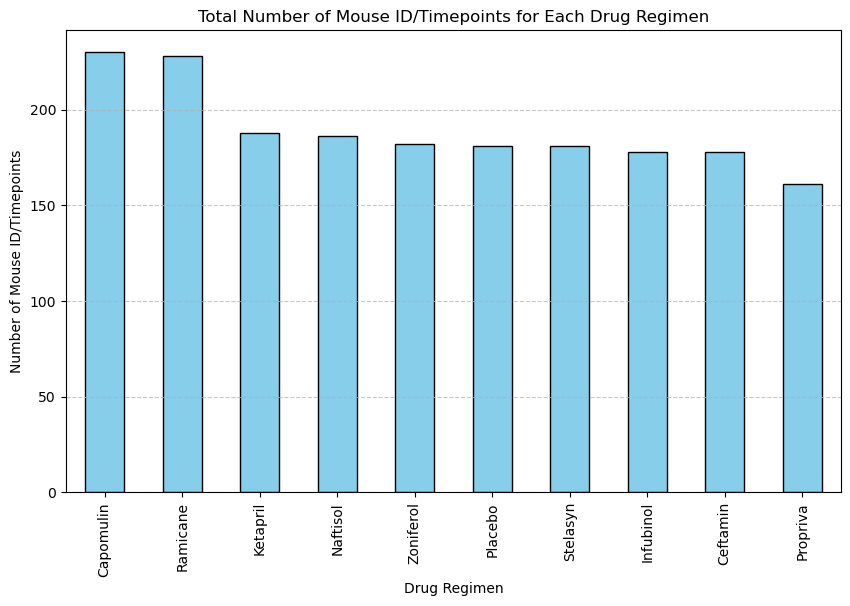

In [125]:
#  Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts =study_meta["Drug Regimen"].value_counts()
drug_counts.plot(kind="bar", figsize=(10,6), color="skyblue", edgecolor="black")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show

In [126]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_study_meta["Drug Regimen"].value_counts()
drug_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

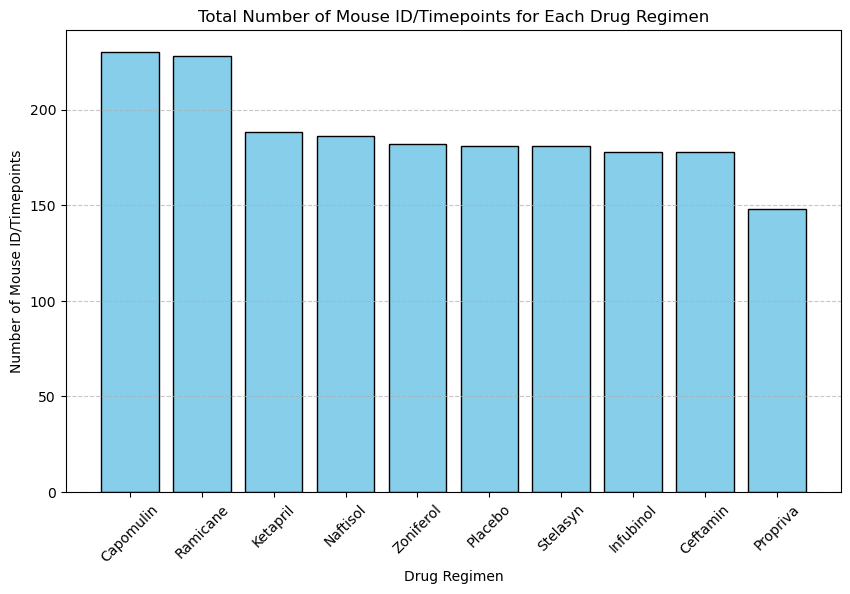

In [127]:
plt.figure(figsize=(10,6))
plt.bar(drug_counts.index, drug_counts.values, color="skyblue", edgecolor="black")


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xticks(rotation=45)  
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


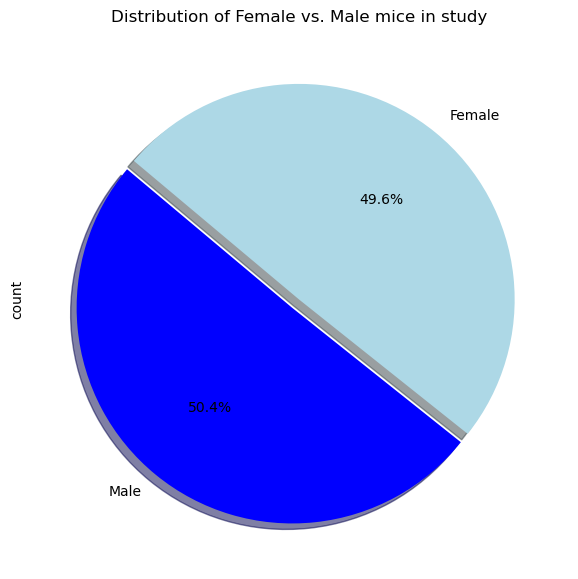

In [128]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_gender=clean_study_meta[["Mouse ID", "Sex"]].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_gender["Sex"].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie',figsize=(7,7), autopct="%1.1f%%", colors=["blue","lightblue" ], 
                   startangle=140, shadow=True, explode=(0.05, 0) )
plt.title("Distribution of Female vs. Male mice in study")
plt.show()

Text(0.5, 1.0, 'Distribution of Unique Female vs Male Mice in the Study')

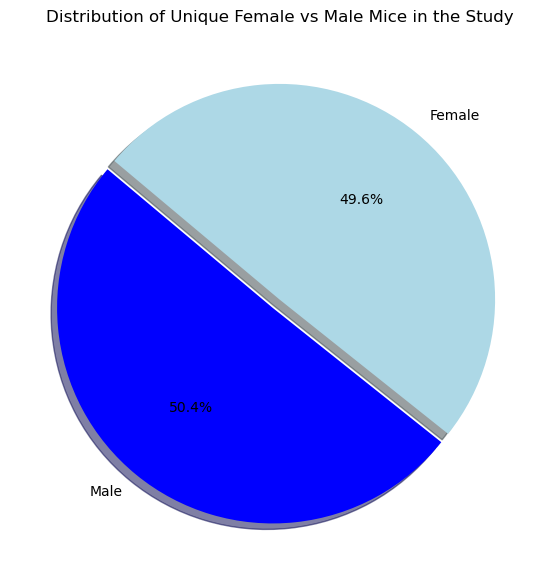

In [129]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.figure(figsize=(7,7))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct="%1.1f%%",colors=["blue", "lightblue"], startangle=140, shadow=True, explode=(0.05,0))

plt.title("Distribution of Unique Female vs Male Mice in the Study")


In [130]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_drugs= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs_filtered= clean_study_meta[clean_study_meta["Drug Regimen"].isin(selected_drugs)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = drugs_filtered.groupby("Mouse ID")["Timepoint"].max().reset_index()
final_tumor_vol=last_timepoints.merge(drugs_filtered, on=["Mouse ID","Timepoint"] , how="left")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543
...,...,...,...,...
95,y769,Ceftamin,45,68.594745
96,y793,Capomulin,45,31.896238
97,y865,Ceftamin,45,64.729837
98,z578,Ramicane,45,30.638696


In [139]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset
    tumor_vol.append(drug_data)

    quartiles = np.percentile(drug_data, [25, 50, 75])
    lowerq, median, upperq = quartiles
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]


print(f"\n{drug} Treatment:")
print(f"Lower Quartile: {lowerq}")
print(f"Median: {median}")
print(f"Upper Quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Potential Outliers: {outliers.values}")


Ceftamin Treatment:
Lower Quartile: 48.72207785
Median: 59.85195552
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []


C:\Users\bnewz\AppData\Local\Temp\ipykernel_27596\1508464414.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol, labels=treatments, patch_artist=True,


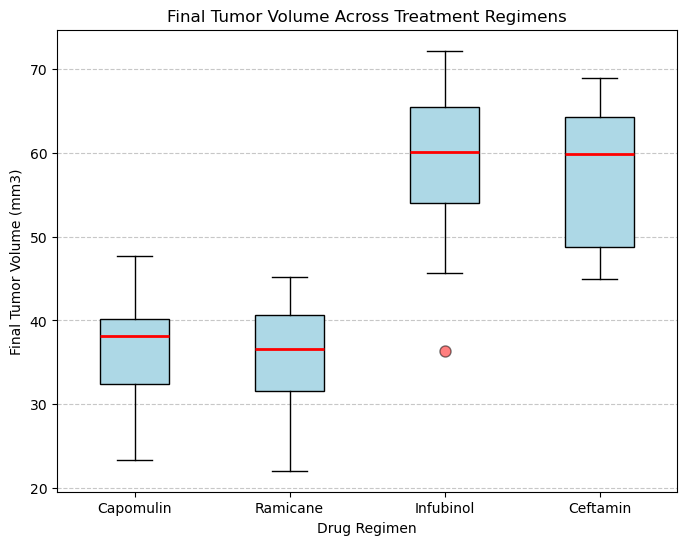

In [143]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8,6))
plt.boxplot(tumor_vol, labels=treatments, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="black"), 
            medianprops=dict(color="red", linewidth=2),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            flierprops=dict(marker="o",markerfacecolor="red", markersize=8, alpha=0.5))
plt.title("Final Tumor Volume Across Treatment Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.grid(axis="y", linestyle="--", alpha=0.7)


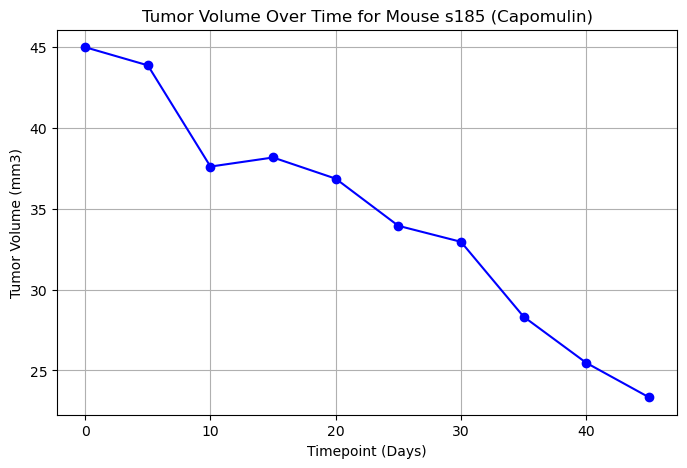

In [144]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_id = clean_study_meta.loc[clean_study_meta["Drug Regimen"] == "Capomulin", "Mouse ID"].unique()[0]
mouse_data = clean_study_meta[clean_study_meta["Mouse ID"] == single_mouse_id]
plt.figure(figsize=(8,5))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o", linestyle="-", color="b")
plt.title(f"Tumor Volume Over Time for Mouse {single_mouse_id} (Capomulin)")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)

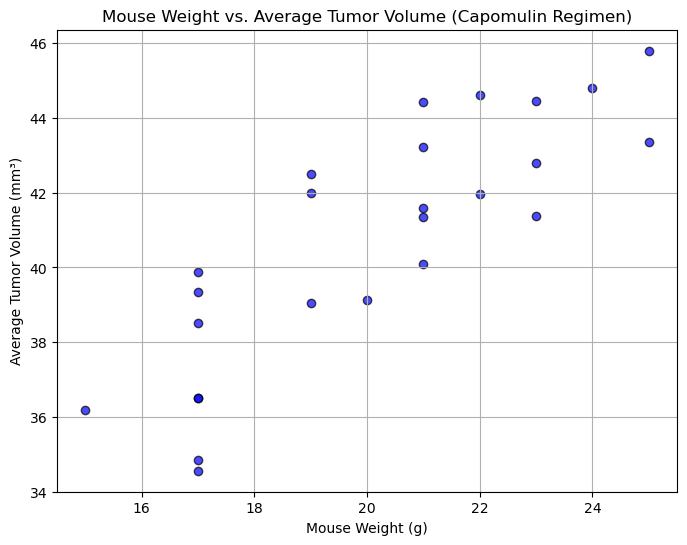

In [145]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin= clean_study_meta[clean_study_meta["Drug Regimen"] == "Capomulin"]
capo_average_tumor_volume = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin.groupby("Mouse ID")["Weight (g)"].first()

plt.figure(figsize=(8,6))
plt.scatter(mouse_weight, capo_average_tumor_volume, color="blue", alpha=0.7, edgecolors="black")

plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm³)")
plt.grid(True)
plt.show()

Correlation Coefficient: 0.84


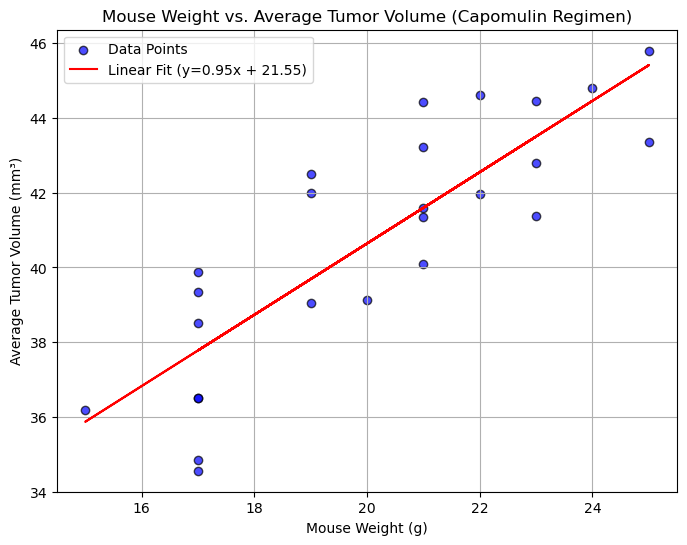

In [148]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, capo_average_tumor_volume)[0]
print(f"Correlation Coefficient: {correlation:.2f}")

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, capo_average_tumor_volume)
regression_line = slope * mouse_weight + intercept
plt.figure(figsize=(8,6))
plt.scatter(mouse_weight, capo_average_tumor_volume, color="blue", alpha=0.7, edgecolors="black", label="Data Points")
plt.plot(mouse_weight, regression_line, color="red", label=f"Linear Fit (y={slope:.2f}x + {intercept:.2f})")

plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm³)")
plt.legend()
plt.grid(True)
plt.show()